In [1]:
# 01_EDA.ipynb - Cell 1
# Purpose: imports, reproducibility, create folders for outputs

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# create folders to store artifacts (plots, models, results)
os.makedirs("plots", exist_ok=True)
os.makedirs("models", exist_ok=True)
os.makedirs("results", exist_ok=True)

# plotting style
sns.set(style="whitegrid")


In [2]:
# 01_EDA.ipynb - Cell 2
df = pd.read_csv("creditcard.csv")   # put file in project root
print("Shape:", df.shape)
display(df.head())
display(df.info())


Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

In [3]:
# 01_EDA.ipynb - Cell 3
print("Missing values per column:")
print(df.isnull().sum())

print("\nBasic statistics (Amount):")
display(df['Amount'].describe())

print("\nClass distribution (counts and percent):")
counts = df['Class'].value_counts()
pct = df['Class'].value_counts(normalize=True) * 100
display(pd.DataFrame({"count": counts, "percent": pct}))



Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Basic statistics (Amount):


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


Class distribution (counts and percent):


,count,percent
Class,,
0,284315,99.827251
1,492,0.172749


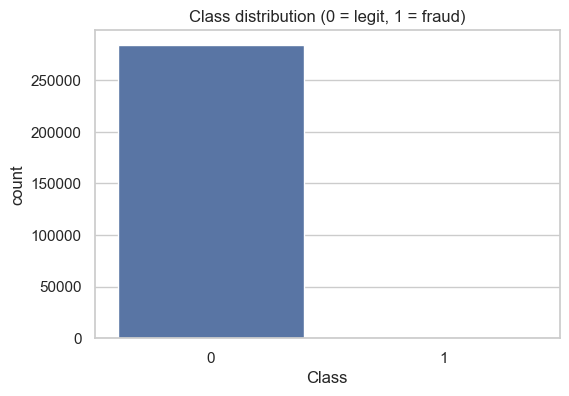

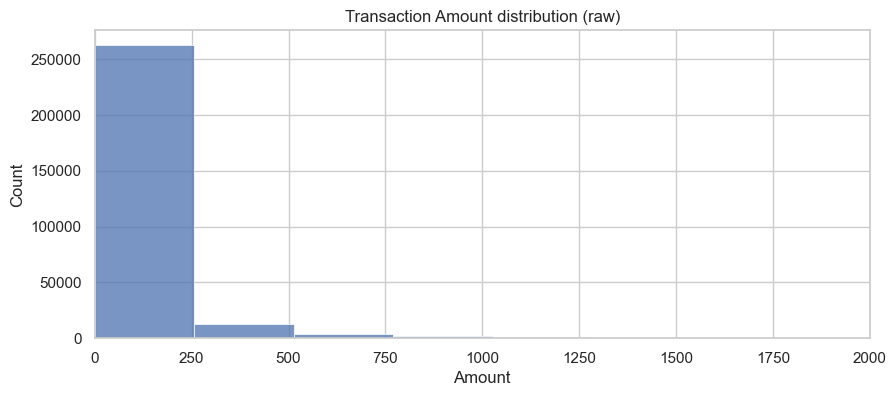

In [4]:
# 01_EDA.ipynb - Cell 4
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class distribution (0 = legit, 1 = fraud)")
plt.savefig("plots/class_distribution.png", bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(df['Amount'], bins=100)
plt.title("Transaction Amount distribution (raw)")
plt.xlim(0, 2000)  # zoom in to see bulk; change if needed
plt.savefig("plots/amount_distribution.png", bbox_inches='tight')
plt.show()


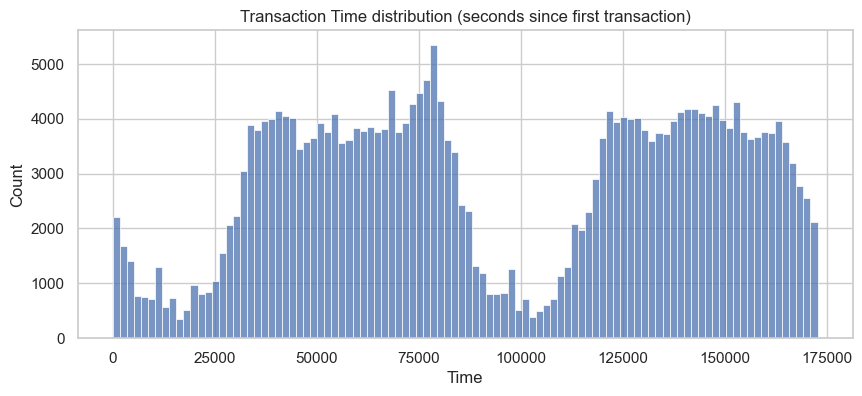

In [5]:
# 01_EDA.ipynb - Cell 5
plt.figure(figsize=(10,4))
sns.histplot(df['Time'], bins=100)
plt.title("Transaction Time distribution (seconds since first transaction)")
plt.savefig("plots/time_distribution.png", bbox_inches='tight')
plt.show()


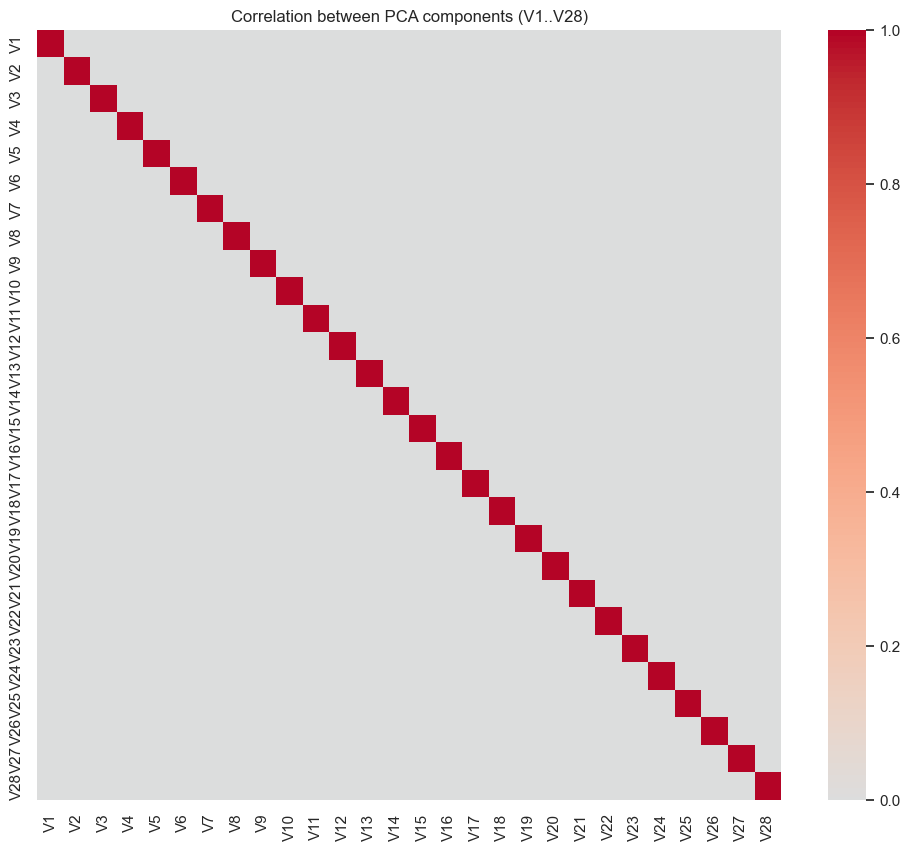

In [6]:
# 01_EDA.ipynb - Cell 6
plt.figure(figsize=(12,10))
sns.heatmap(df.loc[:, df.columns.str.startswith('V')].corr(), cmap='coolwarm', center=0)
plt.title("Correlation between PCA components (V1..V28)")
plt.savefig("plots/pca_corr.png", bbox_inches='tight')
plt.show()
